# Milestone 1

This milestone is assigned to evaluate 4 weeks learning process within bootcamp in Hacktiv8 Full Time Data Science Phase 0

## **Introduction**

### Identity

- Name : Muhammad Irham Dinan
- Batch : FTDS-012

## Dashboard

dashboard: https://irham-dinan-ftds-012-p0m1.herokuapp.com/

## **Objectives**

### Assignment Problems

Kamu adalah seorang Data Analyst yang akan mengerjakan projek besar untuk menyelesaikan suatu permasalahan client dan client kamu butuh sekali hasil analisa datamu menggunakan statistik dan dashboard visualisasi data untuk membantu mereka menyelesaikan masalah. Pilihlah satu dari empat masalah berikut yang dapat kamu bantu selesaikan:

- Tim sukses seorang politisi di California ingin mengadakan kampanye menggunakan Google Ads. Namun, mereka tidak tahu apakah kampanye ini akan berhasil atau tidak dan butuh budget seberapa besar per bulannya. Bantu mereka untuk mengetahui apakah kampanye di Google Ads ini efektif atau tidak. Gunakan dataset google_political_ads di Google Cloud Platform BigQuery.

- Departemen Pengawasan Lalu Lintas Kementerian Perhubungan Amerika Serikat ingin mengetahui kondisi kasus kecelakaan yang terjadi di jalan selama tahun 2016 yang berguna untuk diterapkan kebijakan baru supaya dapat mengurangi angka kecelakaan di kemudian hari. Gunakan dataset nhtsa_traffic_fatalities di Google Cloud Platform BigQuery.

- Kementerian Lingkungan Hidup Amerika Serikat ingin membuat regulasi mengenai emisi industri dan kendaraan bermotor yang kini sangat merusak kualitas udara di negara tersebut. Namun untuk membuat regulasi tersebut, harus diketahui kondisi kualitas udara saat ini di berbagai negara bagian agar mudah menentukan negara bagian mana saja yang harus diterapkan regulasi tersebut terlebih dahulu. Gunakan dataset epa_historical_air_quality di Google Cloud Platform BigQuery.

- CEO toko online "The Look" mencurigai bahwa ada yang tidak beres dari sistem penjualan di tokonya, dari performa penjualan produk, pengiriman barang, dsb. Mohon bantu ungkapkan apakah bermasalah atau tidak dari sistem penjualan di platformnya. Gunakan dataset thelook_ecommerce di Google Cloud Platform BigQuery.

### Case Selection

CEO toko online "The Look" mencurigai bahwa ada yang tidak beres dari sistem penjualan di tokonya, dari performa penjualan produk, pengiriman barang, dsb. Mohon bantu ungkapkan apakah bermasalah atau tidak dari sistem penjualan di platformnya. Gunakan dataset thelook_ecommerce di Google Cloud Platform BigQuery.

### Problem Statements

CEO toko online "The Look" mencurigai bahwa ada yang tidak beres dari sistem penjualan di tokonya, dari performa penjualan produk, pengiriman barang, dsb. Mohon bantu ungkapkan apakah bermasalah atau tidak dari sistem penjualan di platformnya. Gunakan dataset thelook_ecommerce di Google Cloud Platform BigQuery.

*In this problem, we set up some limitation for evaluation: dataset in 2021-2022 is desirable for evaluation.*

We have to consider several aspects to be evaluated as follows:
- Sales & revenue aspect
    - How is the trend of revenues quarterly? Is it increasing?
    - Does the increament/decrement has significant difference? 
- Supply chain aspect
    - Which product category has biggest sales revenue? 
    - How does inventory's condition?
- Marketing & channeling aspect
    - What kind of channel that used by marketing team? Which one have biggest order count come from?
- Shipment & delivery aspect
    - How accurate is the shipment & delivery takes time? 

## **Working Area**

### Query ORDER

SELECT main.order_id, orders.num_of_item, trafs.traffic_source, main.product_id, prods.category, prods.department, prods.cost, main.sale_price, prods.distribution_center_id, centers.name AS distribution_center_name, main.status, main.created_at, main.shipped_at, main.delivered_at, main.returned_at, 
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS main 
JOIN `bigquery-public-data.thelook_ecommerce.orders AS orders` ON main.order_id = orders.order_id 
JOIN `bigquery-public-data.thelook_ecommerce.products AS prods` ON main.product_id = prods.id 
JOIN `bigquery-public-data.thelook_ecommerce.events AS trafs` ON main.order_id = trafs.id 
INNER JOIN `bigquery-public-data.thelook_ecommerce.distribution_centers` AS centers ON prods.distribution_center_id = centers.id
WHERE main.created_at BETWEEN '2021-01-01' AND '2022-06-30'

### Query STOCK PRODUCT

SELECT invs.product_id, invs.product_category, invs.sold_at, product_distribution_center_id
FROM `bigquery-public-data.thelook_ecommerce.inventory_items` as invs
WHERE invs.sold_at IS NULL

### Import Library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Data Loading

In [48]:
# Loading Dataset: Order into DataFrame
df = pd.read_csv(r'C:\Users\Irham\Documents\2022\milestone\p0---ftds012---ml1-dinanirham\dataset\h8dsft_P0M1_Set1_muhammad-irham-dinan.csv')

In [49]:
df.head()

,order_id,num_of_item,traffic_source,product_id,category,department,cost,sale_price,distribution_center_id,distribution_center_name,status,created_at,shipped_at,delivered_at,returned_at
0,31023,3,Email,15917,Plus,Women,1.638,3.5,1,Memphis TN,Shipped,2021-10-29 05:06:10 UTC,2021-10-31 03:27:00 UTC,NaN,NaN
1,32527,1,Adwords,15917,Plus,Women,1.638,3.5,1,Memphis TN,Shipped,2022-01-11 17:00:23 UTC,2022-01-12 07:21:00 UTC,NaN,NaN
2,15424,2,Adwords,15917,Plus,Women,1.638,3.5,1,Memphis TN,Complete,2021-12-14 09:06:40 UTC,2021-12-17 05:26:00 UTC,2021-12-19 13:10:00 UTC,NaN
3,122206,1,Organic,15917,Plus,Women,1.638,3.5,1,Memphis TN,Complete,2021-07-13 15:30:57 UTC,2021-07-14 06:22:00 UTC,2021-07-16 19:12:00 UTC,NaN
4,59748,1,Organic,15917,Plus,Women,1.638,3.5,1,Memphis TN,Returned,2021-08-15 04:57:40 UTC,2021-08-17 21:03:00 UTC,2021-08-19 11:23:00 UTC,2021-08-20 08:45:00 UTC


In [50]:
# Loading Dataset: Stock Product into DataFrame
df2 = pd.read_csv(r'C:\Users\Irham\Documents\2022\milestone\p0---ftds012---ml1-dinanirham\dataset\h8dsft_P0M1_Set2_muhammad-irham-dinan.csv')

In [51]:
df2.head()

,product_id,product_category,sold_at,product_distribution_center_id
0,16898,Tops & Tees,NaN,3
1,16898,Tops & Tees,NaN,3
2,16898,Tops & Tees,NaN,3
3,16898,Tops & Tees,NaN,3
4,16898,Tops & Tees,NaN,3


### Exploratory Data Analysis

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142704 entries, 0 to 142703
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  142704 non-null  int64  
 1   num_of_item               142704 non-null  int64  
 2   traffic_source            142704 non-null  object 
 3   product_id                142704 non-null  int64  
 4   category                  142704 non-null  object 
 5   department                142704 non-null  object 
 6   cost                      142704 non-null  float64
 7   sale_price                142704 non-null  float64
 8   distribution_center_id    142704 non-null  int64  
 9   distribution_center_name  142704 non-null  object 
 10  status                    142704 non-null  object 
 11  created_at                142704 non-null  object 
 12  shipped_at                92860 non-null   object 
 13  delivered_at              49826 non-null   o

In [53]:
df.shape

(142704, 15)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306949 entries, 0 to 306948
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   product_id                      306949 non-null  int64  
 1   product_category                306949 non-null  object 
 2   sold_at                         0 non-null       float64
 3   product_distribution_center_id  306949 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 9.4+ MB


In [55]:
df2.shape

(306949, 4)

### Data Cleaning

#### Handling of Missing Values & Manipulating Column - Set 1

*In dataset: Order, we know that columns 'shipped_at' & 'delivered_at' have several null value, but it will remain unchanged, because they are related to status of order which is useful.*

In [56]:
# Creating dataframe of Revenue by calculating 'sale_price' - 'cost' * 'num_of_item'
df['revenue'] = (df['sale_price'] - df['cost']) * df['num_of_item']

In [57]:
# Modifying dtype of 'created_at', 'shipped_at', 'delivered_at'
df['created_at'] = df['created_at'].astype('datetime64[ns]')
df['shipped_at'] = df['shipped_at'].astype('datetime64[ns]')
df['delivered_at'] = df['delivered_at'].astype('datetime64[ns]')

In [58]:
# Creating dataframe that extract year, month, day of order creation
df['year_created'] = df['created_at'].dt.year
df['month_created'] = df['created_at'].dt.month
df['days_created'] = df['created_at'].dt.dayofweek

# Creating dataframe that extract year, month, day, date of order delivery
df['year_delivered'] = df['delivered_at'].dt.year
df['month_delivered'] = df['delivered_at'].dt.month
df['days_delivered'] = df['delivered_at'].dt.dayofweek
df['date_delivered'] = df['delivered_at'].dt.date
df['quarter'] = df['delivered_at'].dt.quarter

In [59]:
# Creating dataframe of Lag TIme by calculating shipping time & delivery time
df['lag_shipping'] = df['shipped_at'] - df['created_at']
df['lag_delivery'] = df['delivered_at'] - df['shipped_at']

In [60]:
df

,order_id,num_of_item,traffic_source,product_id,category,department,cost,sale_price,distribution_center_id,distribution_center_name,...,year_created,month_created,days_created,year_delivered,month_delivered,days_delivered,date_delivered,quarter,lag_shipping,lag_delivery
0,31023,3,Email,15917,Plus,Women,1.63800,3.50,1,Memphis TN,...,2021,10,4,NaN,NaN,NaN,NaT,NaN,1 days 22:20:50,NaT
1,32527,1,Adwords,15917,Plus,Women,1.63800,3.50,1,Memphis TN,...,2022,1,1,NaN,NaN,NaN,NaT,NaN,0 days 14:20:37,NaT
2,15424,2,Adwords,15917,Plus,Women,1.63800,3.50,1,Memphis TN,...,2021,12,1,2021.0,12.0,6.0,2021-12-19,4.0,2 days 20:19:20,2 days 07:44:00
3,122206,1,Organic,15917,Plus,Women,1.63800,3.50,1,Memphis TN,...,2021,7,1,2021.0,7.0,4.0,2021-07-16,3.0,0 days 14:51:03,2 days 12:50:00
4,59748,1,Organic,15917,Plus,Women,1.63800,3.50,1,Memphis TN,...,2021,8,6,2021.0,8.0,3.0,2021-08-19,3.0,2 days 16:05:20,1 days 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142699,78831,3,Email,10029,Sleep & Lounge,Women,4.55376,7.16,10,Savannah GA,...,2022,5,3,NaN,NaN,NaN,NaT,NaN,NaT,NaT
142700,109752,1,Email,10298,Sleep & Lounge,Women,4.43204,7.16,10,Savannah GA,...,2021,7,2,NaN,NaN,NaN,NaT,NaN,NaT,NaT
142701,114168,1,YouTube,10029,Sleep & Lounge,Women,4.55376,7.16,10,Savannah GA,...,2021,9,5,NaN,NaN,NaN,NaT,NaN,NaT,NaT
142702,88510,1,Email,10029,Sleep & Lounge,Women,4.55376,7.16,10,Savannah GA,...,2022,5,1,NaN,NaN,NaN,NaT,NaN,NaT,NaT


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142704 entries, 0 to 142703
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   order_id                  142704 non-null  int64          
 1   num_of_item               142704 non-null  int64          
 2   traffic_source            142704 non-null  object         
 3   product_id                142704 non-null  int64          
 4   category                  142704 non-null  object         
 5   department                142704 non-null  object         
 6   cost                      142704 non-null  float64        
 7   sale_price                142704 non-null  float64        
 8   distribution_center_id    142704 non-null  int64          
 9   distribution_center_name  142704 non-null  object         
 10  status                    142704 non-null  object         
 11  created_at                142704 non-null  datetime6

#### Handling of Missing Values & Manipulating Column - Set 2

In [62]:
# Manipulating null value with value=1, to counting inventory stock
df2['sold_at'].fillna(value = 1, axis=0, inplace=True)

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306949 entries, 0 to 306948
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   product_id                      306949 non-null  int64  
 1   product_category                306949 non-null  object 
 2   sold_at                         306949 non-null  float64
 3   product_distribution_center_id  306949 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 9.4+ MB


#### Processing-Ready Dataset

In [64]:
df.head(10)

,order_id,num_of_item,traffic_source,product_id,category,department,cost,sale_price,distribution_center_id,distribution_center_name,...,year_created,month_created,days_created,year_delivered,month_delivered,days_delivered,date_delivered,quarter,lag_shipping,lag_delivery
0,31023,3,Email,15917,Plus,Women,1.6380,3.50,1,Memphis TN,...,2021,10,4,NaN,NaN,NaN,NaT,NaN,1 days 22:20:50,NaT
1,32527,1,Adwords,15917,Plus,Women,1.6380,3.50,1,Memphis TN,...,2022,1,1,NaN,NaN,NaN,NaT,NaN,0 days 14:20:37,NaT
2,15424,2,Adwords,15917,Plus,Women,1.6380,3.50,1,Memphis TN,...,2021,12,1,2021.0,12.0,6.0,2021-12-19,4.0,2 days 20:19:20,2 days 07:44:00
3,122206,1,Organic,15917,Plus,Women,1.6380,3.50,1,Memphis TN,...,2021,7,1,2021.0,7.0,4.0,2021-07-16,3.0,0 days 14:51:03,2 days 12:50:00
4,59748,1,Organic,15917,Plus,Women,1.6380,3.50,1,Memphis TN,...,2021,8,6,2021.0,8.0,3.0,2021-08-19,3.0,2 days 16:05:20,1 days 14:20:00
5,33828,4,Email,15917,Plus,Women,1.6380,3.50,1,Memphis TN,...,2022,2,3,NaN,NaN,NaN,NaT,NaN,NaT,NaT
6,100474,2,Adwords,15917,Plus,Women,1.6380,3.50,1,Memphis TN,...,2021,6,6,NaN,NaN,NaN,NaT,NaN,NaT,NaT
7,42218,3,Adwords,15917,Plus,Women,1.6380,3.50,1,Memphis TN,...,2022,2,1,NaN,NaN,NaN,NaT,NaN,NaT,NaT
8,24597,2,YouTube,12602,Intimates,Women,2.1375,3.75,1,Memphis TN,...,2022,2,3,NaN,NaN,NaN,NaT,NaN,-4 days +21:36:23,NaT
9,95464,1,Email,12602,Intimates,Women,2.1375,3.75,1,Memphis TN,...,2022,3,0,2022.0,3.0,5.0,2022-03-19,1.0,1 days 05:44:10,4 days 01:49:00


In [65]:
df.to_csv('dataset1.csv')

In [66]:
df2.to_csv('dataset2.csv')

### Sales & revenue aspect

 #### *How is the trend of revenues quarterly? Is it increasing?*

<AxesSubplot:xlabel='year_delivered,quarter'>

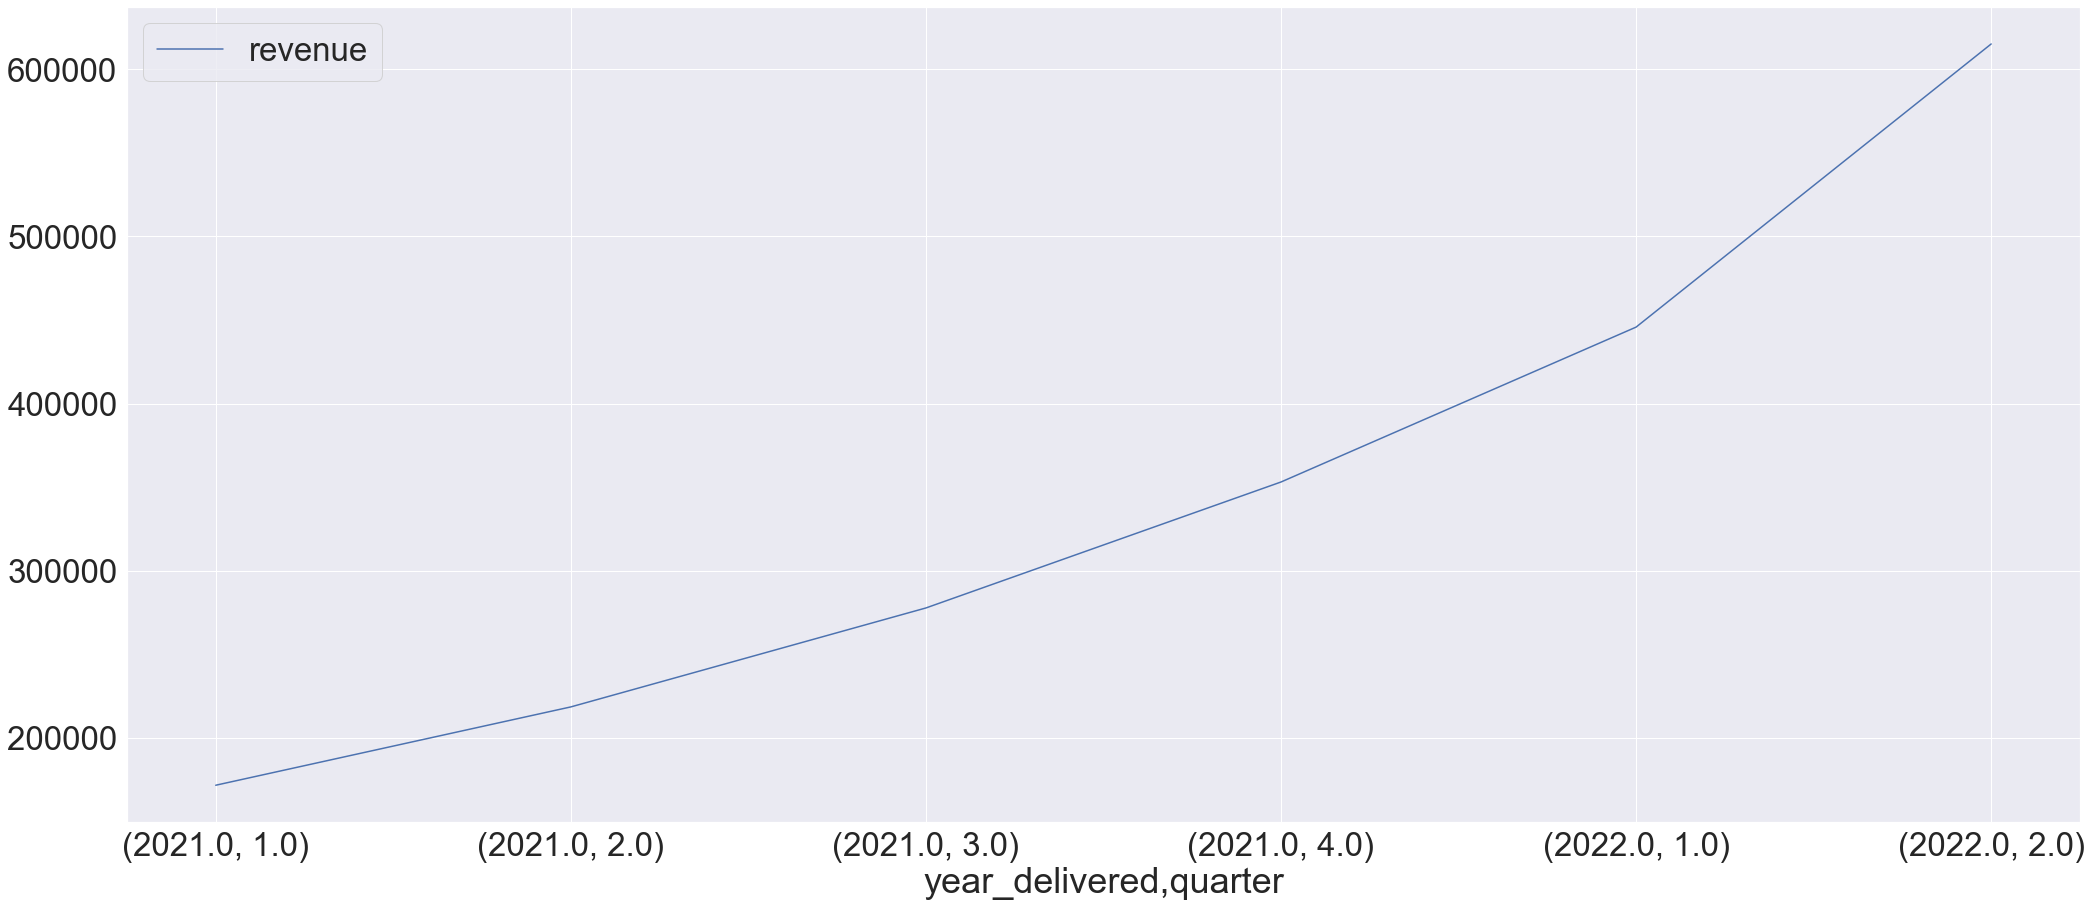

In [67]:
# To produce graph which show trend of revenues, firstly we have to query dataset with 'status' = 'Complete', which will visualize accurately into company's actual situation
completed = df[(df['status'] == 'Complete')]
completed.groupby(by=['year_delivered', 'quarter'])[['revenue']].sum().plot(kind='line')

*by seeing above graph, it indicates that trend of revenue in company are uptrends, whereas in 2021 Q1 up to 2022 Q1, it has constant positive gradient, meanwhile from 2022 Q1 to 2022 Q2 is rising higher.*

#### *Does the increment/decrement has significant difference?*

*As shown in graph above, it visually has indicated increment. however the increment shall be evaluated and tested by inferential statistics whether its daily average revenue in year 2022 are significanly different from previous year.*

*Since we have 2 sample of data: in year 2022 and year 2021 (supposedly indepent from each other), we will use paired test of two samples independent with two tailed test.*

In [68]:
# Creating query dataset of daily average revenue to be validated later for each year 2022 and 2021
year_2022 = df[(df['status']=='Complete') & (df['delivered_at'] >= '2022-01-01')][['date_delivered','revenue']].groupby('date_delivered').sum()
year_2021 = df[(df['status']=='Complete') & (df['delivered_at'] >= '2021-01-01') & (df['delivered_at'] <= '2021-12-31')][['date_delivered','revenue']].groupby('date_delivered').sum()

print('Average Revenue in 2022 per day: ${}'.format(np.round(year_2022.revenue.mean())))
print('Average Revenue in 2021 per day: ${}'.format(np.round(year_2021.revenue.mean())))

Average Revenue in 2022 per day: $6353.0
Average Revenue in 2021 per day: $2794.0


*Hypothesis testing by t-test independent 2 tails*

- H0 : there is no difference between daily average revenue in 2022 with in 2021;
- H1 : there is difference between daily average revenue in 2022 with in 2021

*We define that Confident Interval to be used is 95%, where alpha is 5%*

In [69]:
t_stat, p_val = stats.ttest_ind(year_2022, year_2021)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 1.0656169387025313e-59
t-statistics: 18.58178448683258


*p-value is less than alpha value (1.0656169387025313e-59 < 0.05)*

C:\Users\Irham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Irham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


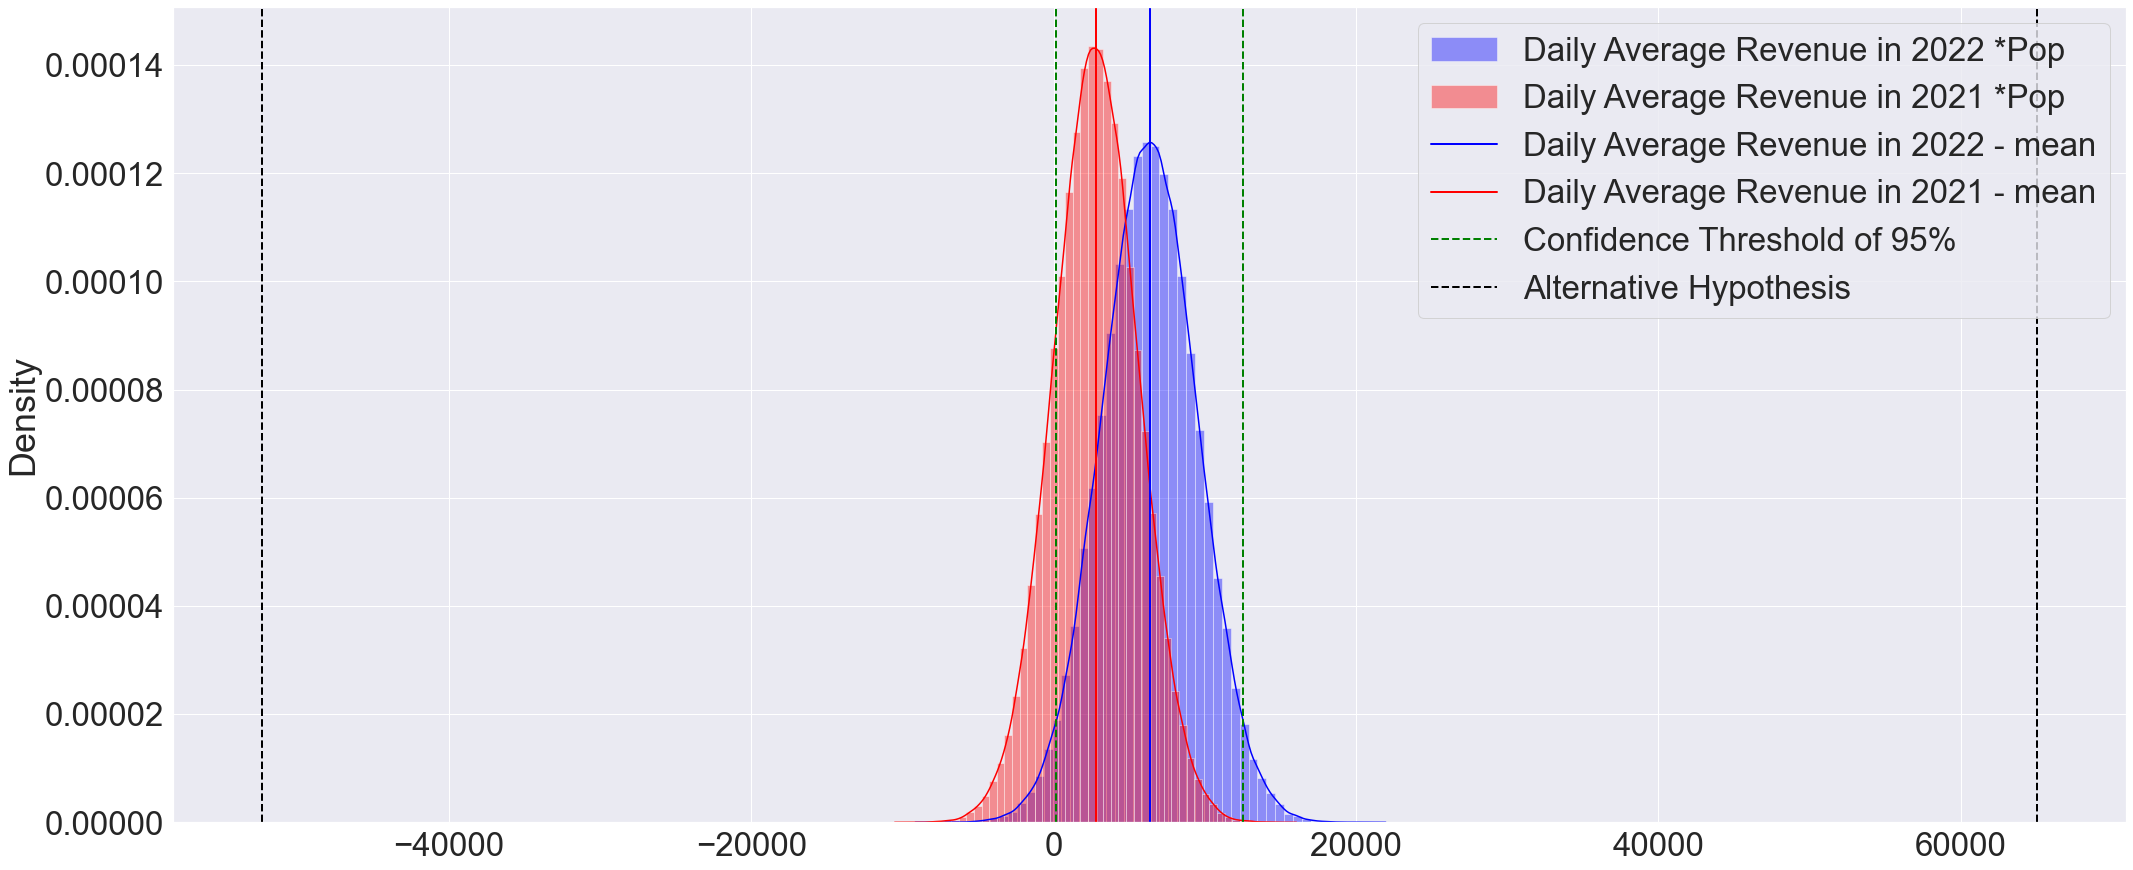

In [70]:
rev2022_pop = np.random.normal(year_2022.revenue.mean(),year_2022.revenue.std(),200000)
rev2021_pop = np.random.normal(year_2021.revenue.mean(),year_2021.revenue.mean(),200000)

ci = stats.norm.interval(0.95, year_2022.revenue.mean(), year_2022.revenue.std())
plt.figure()

sns.distplot(rev2022_pop, label='Daily Average Revenue in 2022 *Pop',color='blue')
sns.distplot(rev2021_pop, label='Daily Average Revenue in 2021 *Pop',color='red')

plt.axvline(year_2022.revenue.mean(), color='blue', linewidth=2, label='Daily Average Revenue in 2022 - mean')
plt.axvline(year_2021.revenue.mean(), color='red',  linewidth=2, label='Daily Average Revenue in 2021 - mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Confidence Threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(rev2022_pop.mean()+t_stat[0]*rev2022_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(rev2022_pop.mean()-t_stat[0]*rev2022_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

*Since p-value is less than 0,05, and also based on the result of alternative hypothesis lines are outside of confidence interval, we can conclude that we  **reject the null hypothesis**. It means daily average revenue in year 2022 and year 2021 are significantly different in term of statistics*

 ### Supply chain aspect

#### *Which product category has biggest sales revenue?*

In [71]:
# Creating query revenue with condition as follows: status = Complete
rev = df[(df['status'] == 'Complete') & (df['year_delivered'] == 2022)][['category', 'revenue', 'department']]
rev.groupby(by=['category','department'])[['revenue']].sum().sort_values(by='category', ascending=False)

revenue
category                      department              
Underwear                     Men         22035.180871
Tops & Tees                   Women       14166.035363
                              Men         28084.390637
Swim                          Women       37133.275514
                              Men         24156.955841
Sweaters                      Men         53553.449172
                              Women       28496.640259
Suits & Sport Coats           Men         74918.281076
Suits                         Women       10901.286408
Socks & Hosiery               Women        7031.381773
Socks                         Men         10338.059953
Sleep & Lounge                Women       17376.667032
                              Men         33711.796393
Skirts                        Women       15374.662018
Shorts                        Women       17393.308277
                              Men         28807.321693
Plus                          Women       16304.524811
Pants & Capris                Women       18108.035527
Pants                         Men         38094.768958
Outerwear & Coats             Women       47895.581204
                              Men         78765.259581
Maternity                     Women       29022.719029
Leggings                      Women        5487.088053
Jumpsuits & Rompers           Women        3253.242857
Jeans                         Women       41464.489677
                              Men         73250.335154
Intimates                     Women       42745.645967
Fashion Hoodies & Sweatshirts Women       26832.978898
                              Men         32363.717917
Dresses                       Women       49711.546689
Clothing Sets                 Women        1889.971269
Blazers & Jackets             Women       36863.923279
Active                        Men         29698.662742
                              Women       19383.335529
Accessories                   Women       19255.381321
                              Men         27075.470940

Text(0.5, 0, 'in Dollars')

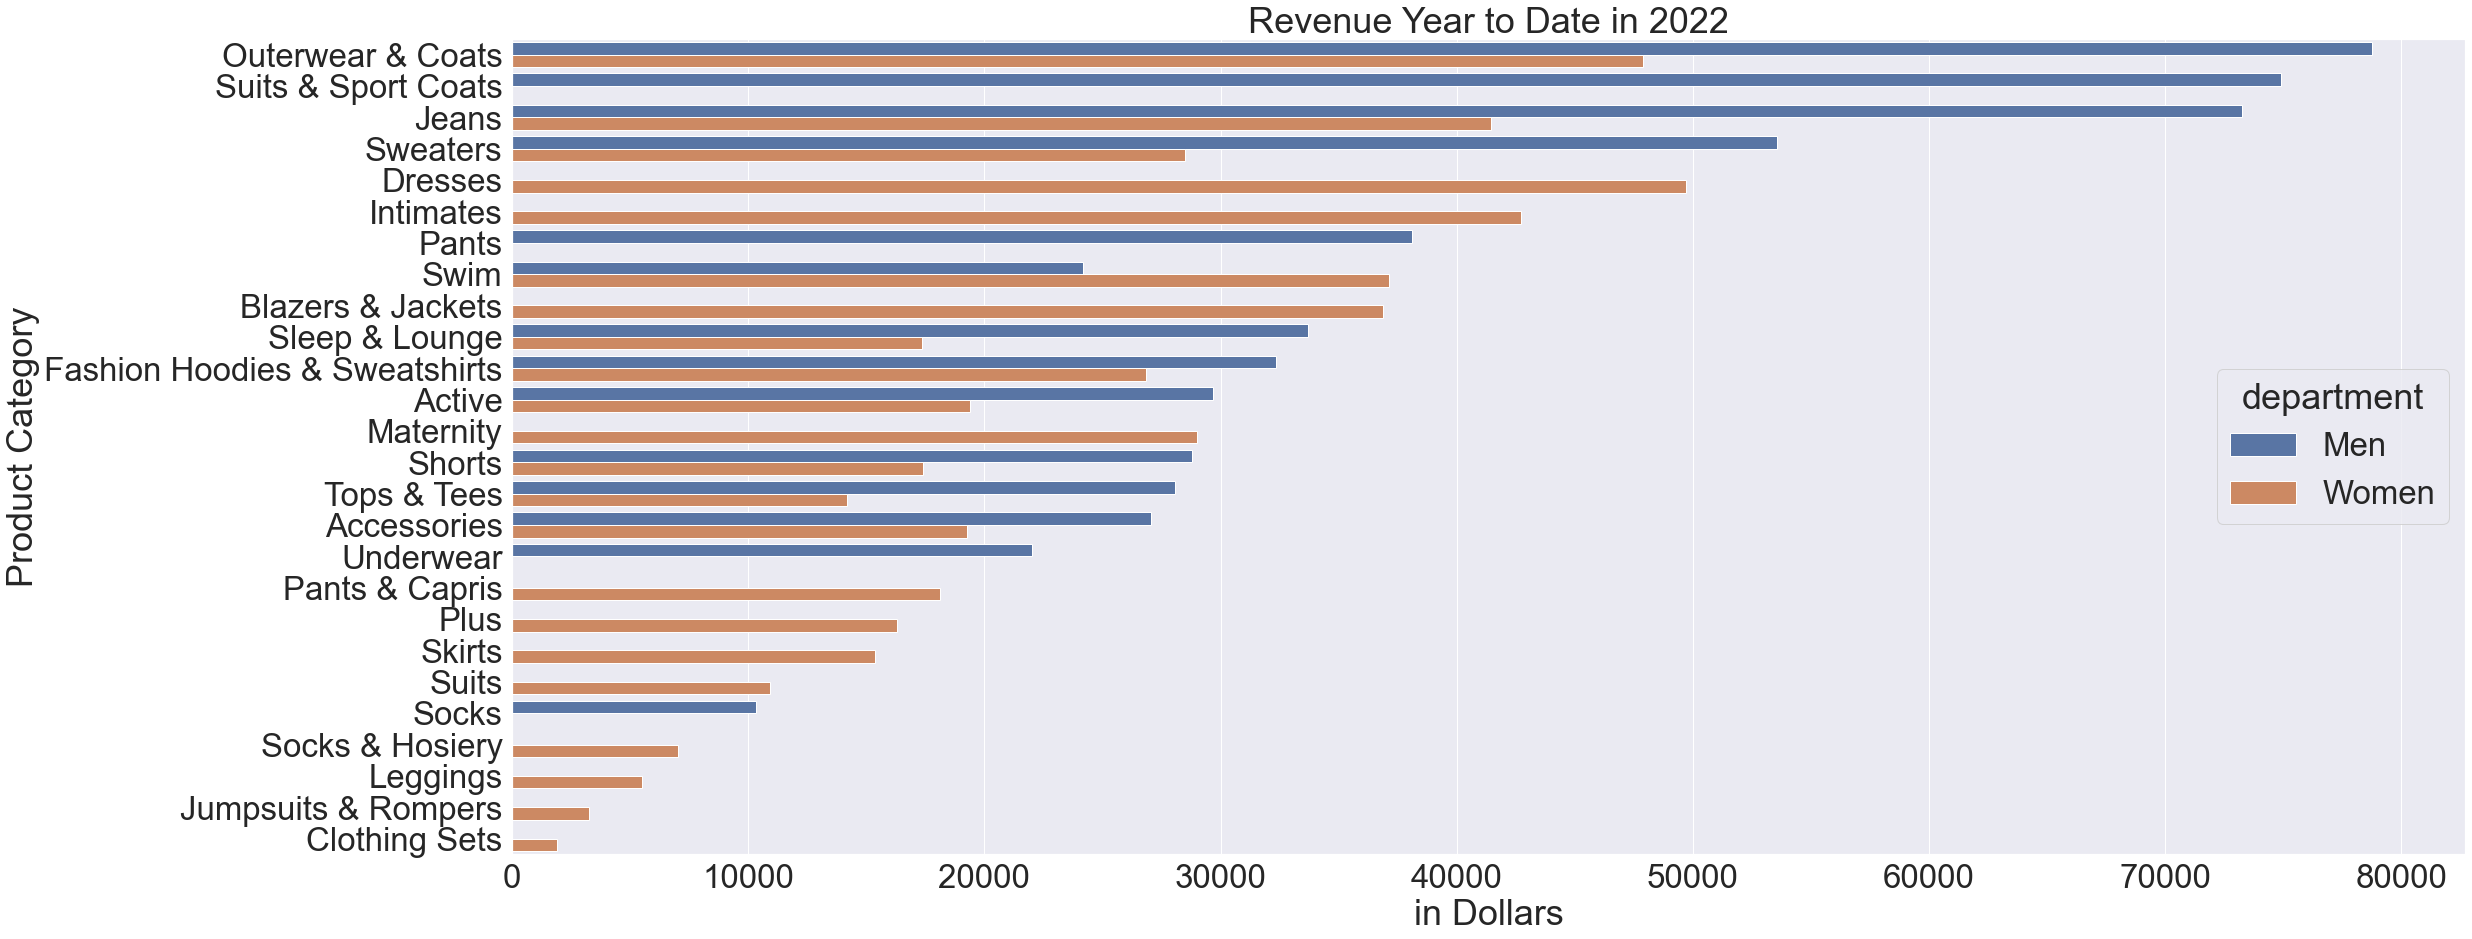

In [72]:
multi = rev.groupby(by=['category', 'department'])[['revenue']].sum().sort_values(by='revenue', ascending=False).reset_index()

sns.barplot(y=multi['category'],x=multi['revenue'], orient='h', hue=multi['department']).set(title='Revenue Year to Date in 2022')
sns.set(font_scale=3, rc={"figure.figsize":(35, 15)})
plt.ylabel('Product Category')
plt.xlabel('in Dollars')

*Refer to the barplot, we can see that following categories: Outerwear & Coats, Suits & Sport Coats, Jeans, Sweaters, and Dresses are top-5 categories in terms of Revenues.*

*We can also grasp other insightful information by above barplot, men department is bigger contributions than women.*

#### *How does inventory's condition?*

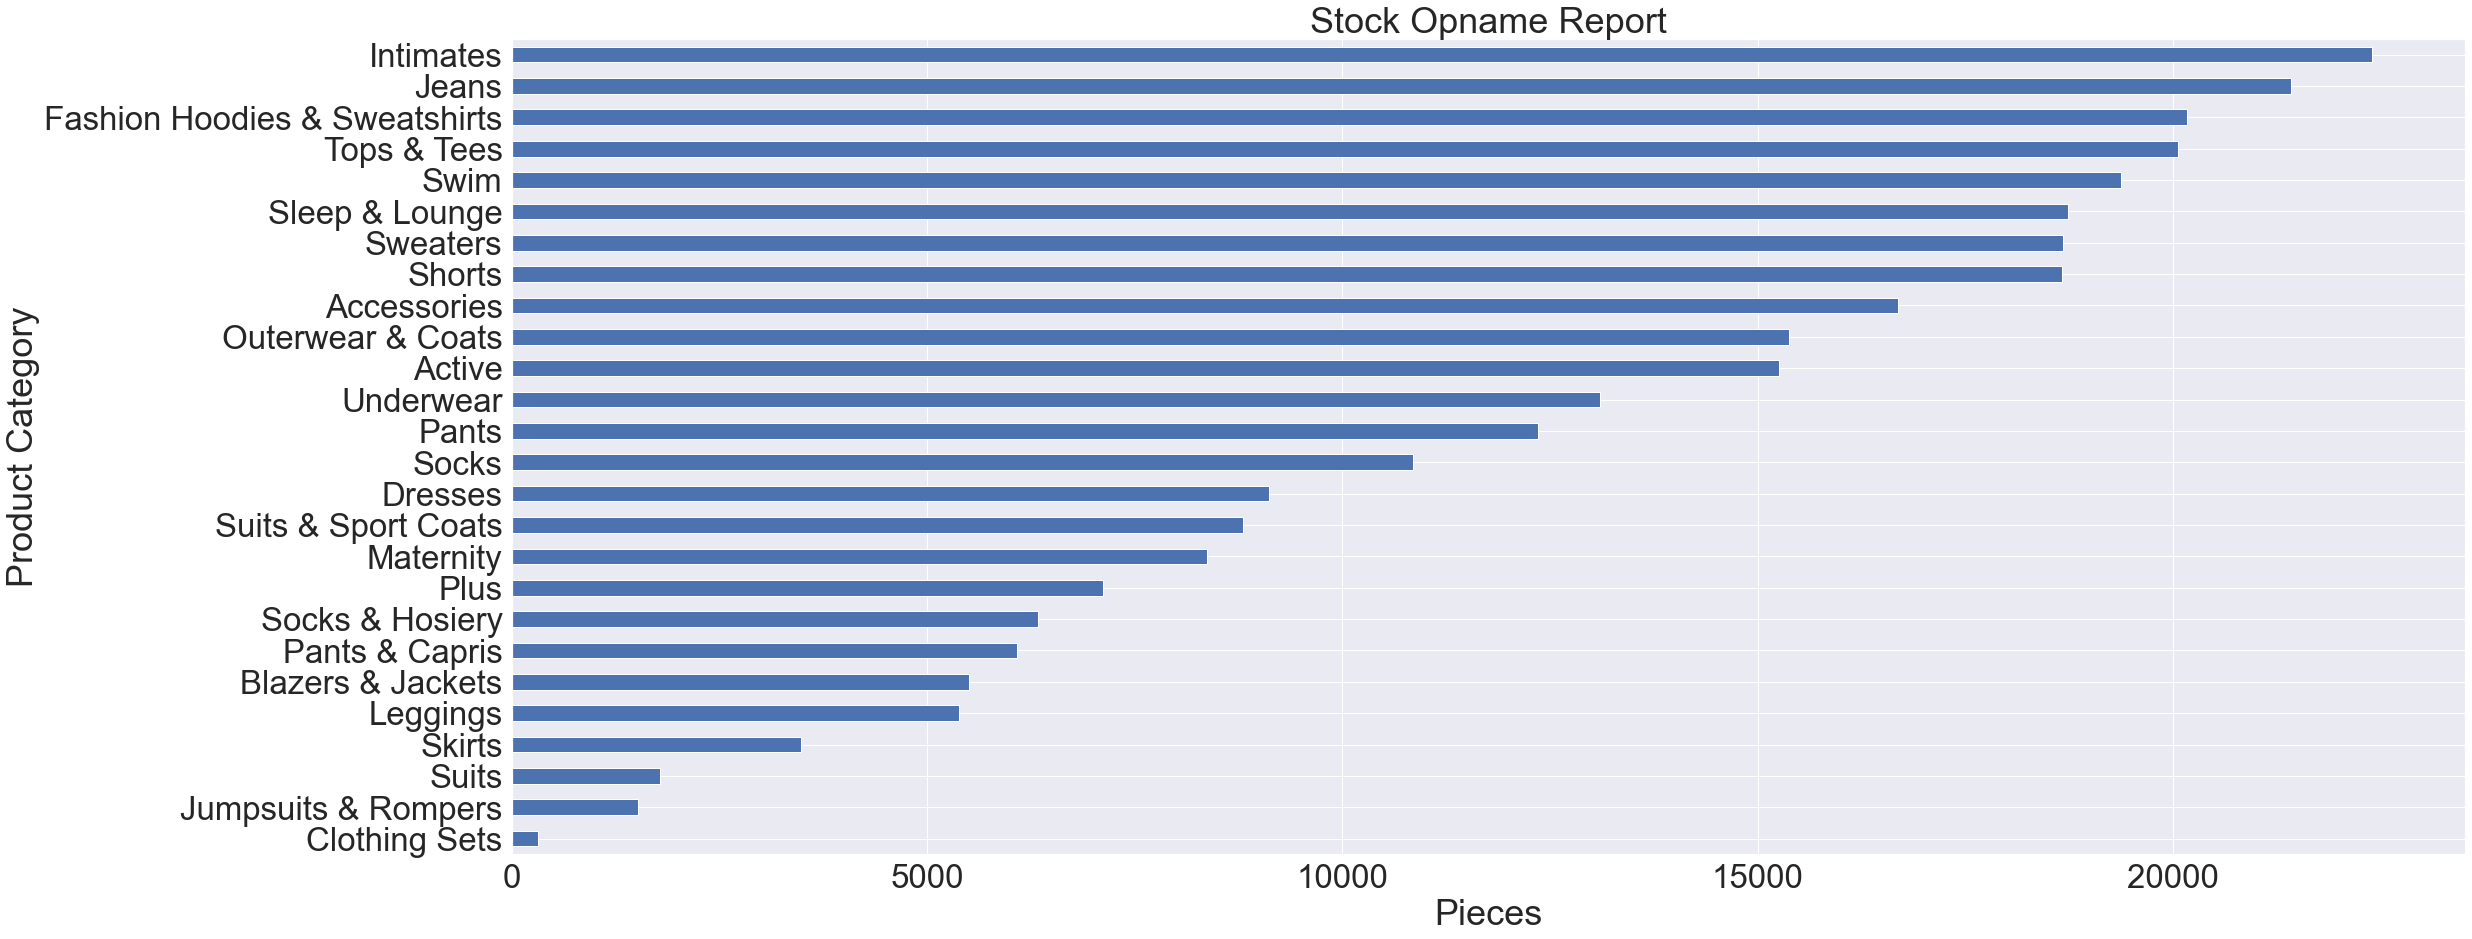

In [73]:
# Creating query and aggregating dataset: Order to check inventory conditions
stock = df2['product_category'].value_counts().sort_values(ascending=True)
stock.plot(kind='barh')
plt.title('Stock Opname Report')
plt.ylabel('Product Category')
plt.xlabel('Pieces')
plt.show()

*Base on the graph, we can see that most of favorite product in sales are still on adequate stock. We can also see the typical stock vs sold categories are in same proportional. In example, top categories in sales & revenues are also available in stock, meanwhile the least categories in sales & revenues are also the bottom part of inventory ranks.*

### Marketing & channeling aspect

#### *What kind of channel that used by marketing team? Which one have biggest order count come from?*

Text(0.5, 1.0, 'Order per Traffic Source')

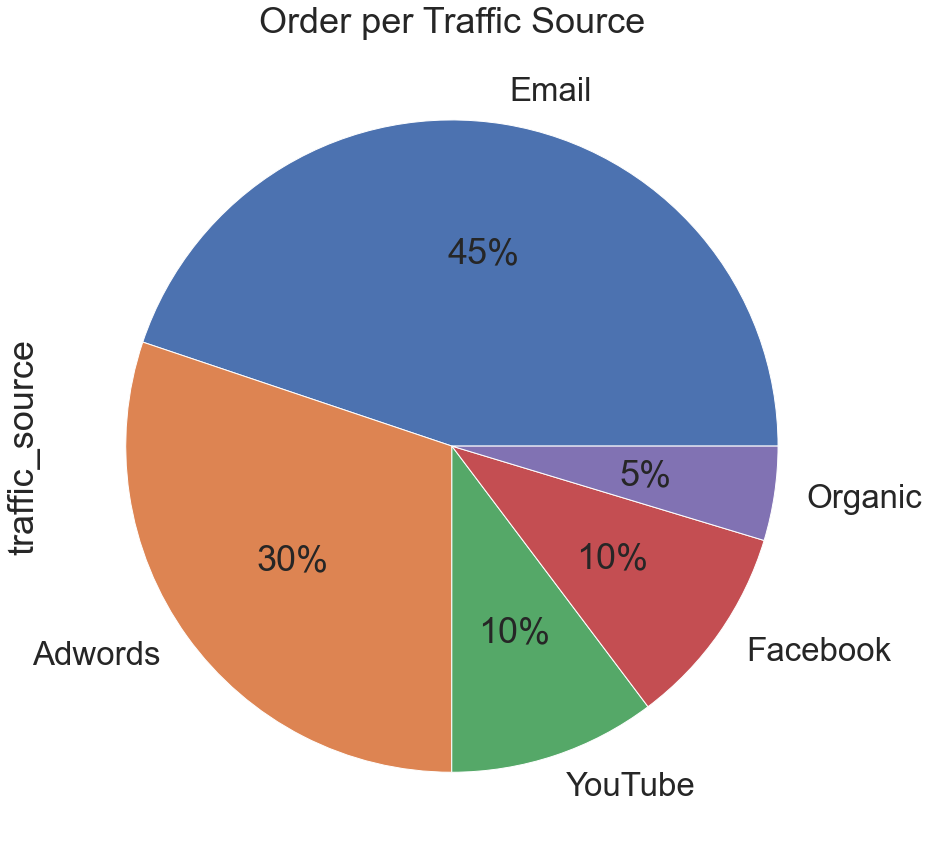

In [74]:
df['traffic_source'].value_counts().plot(kind='pie',autopct='%1.f%%')
plt.title('Order per Traffic Source')

*Based on the pie chart, we can conclude that email is the most favorable traffic source upon all orders. It means our method to broadcast with symphatic messages in email is on the track to get higher number of order and also effective ways in term of cost of marketing*

### Shipment & delivery aspect

#### *How accurate is the shipment & delivery takes time?*

In [75]:
# Creating query revenue with condition as follows: status = Complete
lag = df[(df['status'] == 'Complete') & (df['lag_shipping'] >= pd.Timedelta(0, unit='s')) & (df['lag_delivery'] >= pd.Timedelta(0, unit='s'))][['status','distribution_center_name', 'lag_shipping', 'lag_delivery']]
lag.groupby(by=['distribution_center_name'])[['lag_shipping', 'lag_delivery']].mean().sort_values(by='distribution_center_name', ascending=True)

,lag_shipping,lag_delivery
distribution_center_name,,
Charleston SC,1 days 10:52:29.623836951,2 days 11:00:03.455914931
Chicago IL,1 days 11:12:24.933830382,2 days 11:26:41.509785647
Houston TX,1 days 11:19:59.208888888,2 days 12:22:27.961904761
Los Angeles CA,1 days 11:07:14.093671940,2 days 12:11:10.216486261
Memphis TN,1 days 10:59:46.825796661,2 days 11:27:15.823975720
Mobile AL,1 days 11:13:16.474949083,2 days 12:24:55.649694501
New Orleans LA,1 days 10:31:16.404317386,2 days 10:45:22.298716452
Philadelphia PA,1 days 11:00:49.213263979,2 days 12:39:23.823146944
Port Authority of New York/New Jersey NY/NJ,1 days 11:11:07.197669206,2 days 11:46:04.087852980


In [76]:
# Measuring central tendency value of lag time of shipping & delivery
lag['lag_shipping'].mean()

Timedelta('1 days 11:02:00.982667640')

In [77]:
lag['lag_shipping'].median()

Timedelta('1 days 09:45:03')

In [78]:
lag['lag_shipping'].mode()

0    0 days 03:16:46
1    0 days 03:46:01
2    0 days 03:58:33
3    0 days 04:23:57
4    0 days 05:43:23
5    0 days 07:02:36
6    0 days 09:42:23
7    0 days 10:55:37
8    0 days 10:56:02
9    0 days 11:40:20
10   0 days 12:02:01
11   0 days 17:12:07
12   0 days 17:16:08
13   0 days 18:51:45
14   0 days 19:11:26
15   0 days 20:18:24
16   0 days 21:41:24
17   0 days 22:20:35
18   0 days 23:00:37
19   0 days 23:33:07
20   1 days 02:53:43
21   1 days 08:10:01
22   1 days 10:53:55
23   1 days 11:26:54
24   1 days 13:14:37
25   1 days 14:11:20
26   1 days 16:33:46
27   1 days 16:47:34
28   1 days 18:36:12
29   1 days 20:19:01
30   1 days 20:36:30
31   1 days 21:02:30
32   1 days 22:11:21
33   2 days 01:29:57
34   2 days 04:35:33
35   2 days 04:48:41
36   2 days 11:24:33
37   2 days 13:38:47
38   2 days 14:50:21
Name: lag_shipping, dtype: timedelta64[ns]

In [79]:
lag['lag_delivery'].mean()

Timedelta('2 days 11:48:56.755966877')

In [80]:
lag['lag_delivery'].median()

Timedelta('2 days 11:39:00')

In [81]:
lag['lag_delivery'].mode()

0   1 days 11:53:00
1   2 days 11:53:00
2   2 days 15:25:00
Name: lag_delivery, dtype: timedelta64[ns]

*We can see that mean value > median value in lag time of shipping & delivery, so the distribution of lag time is NOT distribution normal, it will have right skew / positive skewness*

## **Summary & Conclusion**

### Recap Data Analysis

- Data Preparation:
    - Selecting dataset by query in Google Cloud Platform
    - Loading dataset
- Exploratory Data Analysis
    - Handling missing values
    - Manipulating column & values
- Answering Question
- Summary Conclusion

### Overall Conclusion

- Sales & revenue aspect
    - How is the trend of revenues quarterly? Is it increasing?
        - the trend is uprising
    - Does the increament/decrement has significant difference? 
        - Yes, it is statistically increasing by hypothesis testing using paired test independent sample two tail, with p-value < 0.05, therefore h0 is rejected, 
- Supply chain aspect
    - Which product category has biggest sales revenue? 
        - Outerwear & Coats, Suits & Sport Coats, Jeans, Sweaters, and Dresses are top-5 categories in terms of Revenues
    - How does inventory's condition?
        - product in sales are still on adequate in inventory stock and also they are in same proportional. 
- Marketing & channeling aspect
    - What kind of channel that used by marketing team? Which one have biggest order count come from?
        - email is the most favorable traffic source upon all orders. 
- Shipment & delivery aspect
    - How accurate is the shipment & delivery takes time? 
        - mean value > median value in lag time of shipping & delivery, so the distribution of lag time is NOT distribution normal, it will have right skew / positive skewness
        
**So, we can conclude that TheLook Ecommerce in good condition, the CEO must not be worry**